In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import torch as t

In [2]:
def get_folder_path():
    path = './info'
    return path

In [3]:
def get_acc(path, train=True):
    with open(path, 'r') as f:
        ret = []
        for line in f.readlines():
            line = line.strip()
            if train:
                if line.startswith("train"):
                    ret.append(float(line.split(' ')[-1]))
            else:
                if line.startswith("test"):
                    ret.append(float(line.split(' ')[-1]))
    return ret

In [4]:
def get_curve_data():
    folder_path = get_folder_path()
    filenames = [name for name in os.listdir(folder_path)]
    paths = [os.path.join(folder_path, name) for name in filenames]
    keys = [name.split('-')[1] for name in filenames]
    # eg:  sgd : './info/resnet-sgd'
    info = {key: path for key, path in zip(keys, paths)}
    data = {}
    for k, v in info.items():
        data[k] = {
            'train': get_acc(v, train=True),
            'test': get_acc(v, train=False)
        }
    return data

"""
{
    'sgd':
        'train':[1,2,3]
        'test':[1,2,3]
        
}
"""

"\n{\n    'sgd':\n        'train':[1,2,3]\n        'test':[1,2,3]\n        \n}\n"

In [24]:
def get_max(lst):
    max_acc = lst[0]
    idx = 0
    for i, temp in enumerate(lst):
        if temp >= max_acc:
            max_acc = temp
            idx = i
    return max_acc, idx

In [25]:
def plot(curve_type="Train", model="ResNet"):
    plt.figure()
    plt.title('{} Accuracy for {} on CIFAR-10'.format(curve_type, model))
    plt.xlabel('Epoch')
    plt.ylabel('{} Accuracy %'.format(curve_type))
    plt.ylim(80, 101 if curve_type == 'Train' else 96)
    
    data = get_curve_data()
    
    linetype = '-'
    for k, v in data.items():
        accuracies = data[k][curve_type.lower()]
        plt.plot(accuracies, label=k, ls=linetype)
        print(k, get_max(accuracies))
    
    plt.grid(ls='--')
    plt.legend()
    plt.show()

adabound (99.996, 197)
adagrad (99.99, 187)
adam (99.286, 192)
amsbound (100.0, 193)
amsgrad (99.628, 198)
sgd (99.318, 161)


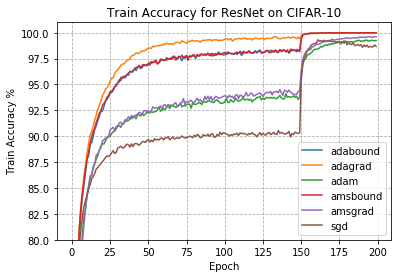

In [28]:
plot()

adabound (94.9, 197)
adagrad (92.41, 198)
adam (93.07, 157)
amsbound (94.9, 191)
amsgrad (93.61, 178)
sgd (94.56, 157)


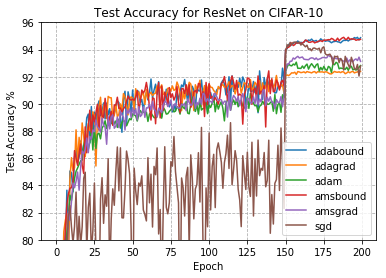

In [29]:
plot("Test")

In [30]:
def get_folder_path():
    path = './sgdm'
    return path


def get_acc(path, train=True):
    with open(path, 'r') as f:
        ret = []
        for line in f.readlines():
            line = line.strip()
            if train:
                if line.startswith("train"):
                    ret.append(float(line.split(' ')[-1]))
            else:
                if line.startswith("test"):
                    ret.append(float(line.split(' ')[-1]))
    return ret

def get_curve_data():
    folder_path = get_folder_path()
    filenames = [name for name in os.listdir(folder_path)]
    paths = [os.path.join(folder_path, name) for name in filenames]
    keys = [name.split('-')[1]+name.split('-')[3][8:] for name in filenames]
    # eg:  sgd : './info/resnet-sgd'
    info = {key: path for key, path in zip(keys, paths)}
    data = {}
    for k, v in info.items():
        data[k] = {
            'train': get_acc(v, train=True),
            'test': get_acc(v, train=False)
        }
    return data



def plot(curve_type="Train", model="ResNet"):
    plt.figure()
    plt.title('{} Accuracy for {} on CIFAR-10'.format(curve_type, model))
    plt.xlabel('Epoch')
    plt.ylabel('{} Accuracy %'.format(curve_type))
    plt.ylim(80, 101 if curve_type == 'Train' else 96)
    
    data = get_curve_data()
    
    linetype = '-'
    for k, v in data.items():
        accuracies = data[k][curve_type.lower()]
        plt.plot(accuracies, label=k, ls=linetype)
        print(k, get_max(accuracies))
    
    plt.grid(ls='--')
    plt.legend()
    plt.show()

adabound (99.996, 197)
amsbound (100.0, 193)
sgd0.5.out (99.994, 193)
sgd0.9.out (99.318, 161)
sgd0.out (99.998, 196)


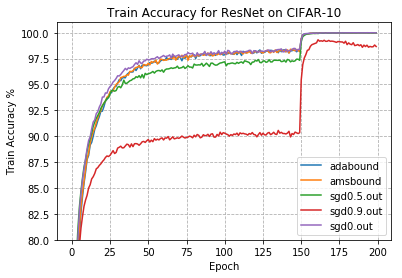

In [38]:
plot()

sgd0.5.out (95.26, 189)
sgd0.9.out (94.56, 157)
sgd0.out (95.2, 185)


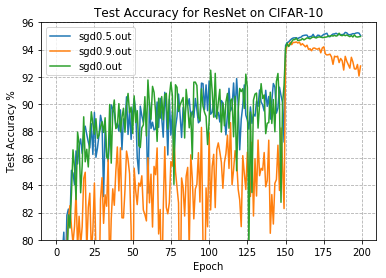

In [36]:
plot("Test")

In [39]:
def get_folder_path():
    path = './sgdm'
    return path


def get_acc(path, train=True):
    with open(path, 'r') as f:
        ret = []
        for line in f.readlines():
            line = line.strip()
            if train:
                if line.startswith("train"):
                    ret.append(float(line.split(' ')[-1]))
            else:
                if line.startswith("test"):
                    ret.append(float(line.split(' ')[-1]))
    return ret

def get_curve_data(path):
    folder_path = path
    filenames = [name for name in os.listdir(folder_path)]
    paths = [os.path.join(folder_path, name) for name in filenames]
    keys = [name.split('-')[1]+name.split('-')[3][8:] for name in filenames]
    # eg:  sgd : './info/resnet-sgd'
    info = {key: path for key, path in zip(keys, paths)}
    data = {}
    for k, v in info.items():
        data[k] = {
            'train': get_acc(v, train=True),
            'test': get_acc(v, train=False)
        }
    return data



def plot(path, curve_type="Train", model="ResNet"):
    plt.figure()
    plt.title('{} Accuracy for {} on CIFAR-10'.format(curve_type, model))
    plt.xlabel('Epoch')
    plt.ylabel('{} Accuracy %'.format(curve_type))
    plt.ylim(80, 101 if curve_type == 'Train' else 96)
    
    data = get_curve_data(path)
    
    linetype = '-'
    for k, v in data.items():
        accuracies = data[k][curve_type.lower()]
        plt.plot(accuracies, label=k, ls=linetype)
        print(k, get_max(accuracies))
    
    plt.grid(ls='--')
    plt.legend()
    plt.show()

sgd0.5.out (99.994, 193)
sgd0.9.out (99.318, 161)
sgd0.out (99.998, 196)


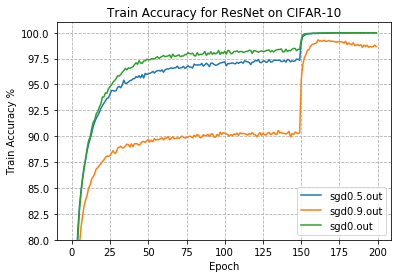

sgd0.5.out (95.26, 189)
sgd0.9.out (94.56, 157)
sgd0.out (95.2, 185)


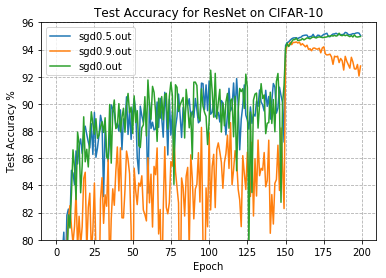

In [41]:
plot('./sgdm')
plot('./sgdm', "Test")

adabound (99.996, 197)
amsbound (100.0, 193)
sgd0.5.out (99.994, 193)
sgd0.9.out (99.318, 161)


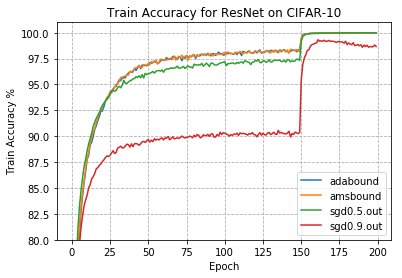

adabound (94.9, 197)
amsbound (94.9, 191)
sgd0.5.out (95.26, 189)
sgd0.9.out (94.56, 157)


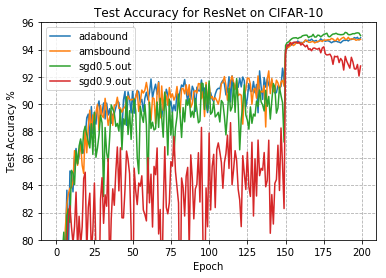

In [44]:
plot('./sgdm-adabound')
plot('./sgdm-adabound', "Test")

adabound (99.996, 197)
sgd0.out (99.998, 196)


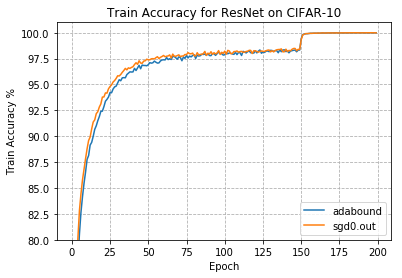

adabound (94.9, 197)
sgd0.out (95.2, 185)


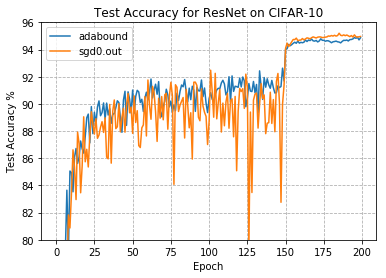

In [45]:
plot('./sgd-adabound')
plot('./sgd-adabound', "Test")